In [50]:
import numpy as np
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import tensorflow as tf

In [2]:
def get_weights(number_of_features):
    if number_of_features == 1:
        return [1.0]
    elif number_of_features == 2:
        return [2./3, 1./3]
    elif number_of_features == 3:
        return [1./2, 1./3, 1./6]
    elif number_of_features == 4:
        return [2./5, 3./10, 1./5, 1./10]

In [9]:
y_true = np.array([
    [ 
        [1, 2],
        [3, 4],
        [5, 6]
    ],
    [ 
        [10, 20],
        [30, 40],
        [50, 60]
    ]    
])

y_pred = np.array([
    [ 
        [0, 0],
        [0, 0],
        [0, 0]
    ],
    [ 
        [0, 0],
        [0, 0],
        [0, 0]
    ]
    
])
print("y_true",y_true.shape)

y_true (2, 3, 2)


In [10]:
residuals = np.square(y_true - y_pred)
residuals

array([[[   1,    4],
        [   9,   16],
        [  25,   36]],

       [[ 100,  400],
        [ 900, 1600],
        [2500, 3600]]])

## Tensorflow's way

In [15]:
averaged_mse = np.average(residuals, axis=-1, weights=get_weights(y_true.shape[-1]))
averaged_mse

array([[2.00000000e+00, 1.13333333e+01, 2.86666667e+01],
       [2.00000000e+02, 1.13333333e+03, 2.86666667e+03]])

In [12]:
averaged_mse.shape

(2, 3)

In [13]:
tf.math.reduce_mean(averaged_mse, axis=None, keepdims=False, name=None)

<tf.Tensor: shape=(), dtype=float64, numpy=707.0>

## The other way around 

In [22]:
mse_on_features = np.mean(residuals, axis=1)
mse_on_features

array([[  11.66666667,   18.66666667],
       [1166.66666667, 1866.66666667]])

In [28]:
mse_on_features.shape

(2, 2)

In [27]:
averaged_mse_2 = np.average(mse_on_features, axis=-1, weights=get_weights(mse_on_features.shape[-1]))
averaged_mse_2

array([  14., 1400.])

In [29]:
averaged_mse_2.shape

(2,)

In [26]:
np.mean(averaged_mse_2)

707.0

## Tensorflow implementation

In [51]:
import tensorflow as tf

In [52]:
def get_weights(n_features):
    if n_features == 1:
        return tf.constant([1.0], dtype=tf.float32)
    elif n_features == 2:
        return tf.constant([2./3, 1./3], dtype=tf.float32)
    elif n_features == 3:
        return tf.constant([1./2, 1./3, 1./6], dtype=tf.float32)
    elif n_features == 4:
        return tf.constant([2./5, 3./10, 1./5, 1./10], dtype=tf.float32)

In [53]:
y_true = tf.constant(y_true, dtype=tf.float32)
y_pred = tf.constant(y_pred, dtype=tf.float32)

In [54]:
mse_per_sample_features = tf.math.reduce_mean(tf.math.square(y_true - y_pred), axis=1)
mse_per_sample_features

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[  11.666667,   18.666666],
       [1166.6666  , 1866.6666  ]], dtype=float32)>

In [47]:
mse_per_sample_features * get_weights(2)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[  7.777778 ,   6.2222223],
       [777.7778   , 622.2222   ]], dtype=float32)>

In [49]:
tf.math.reduce_sum(mse_per_sample_features * get_weights(2), axis=1) 

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([  14., 1400.], dtype=float32)>

## Tensorflow implementation with real samples

In [58]:
import matplotlib.pyplot as plt

In [68]:
y_true = np.random.uniform(0, 1, size=(10, 5, 3))
y_pred = np.random.uniform(0, 0.6, size=(10, 5, 3)) 

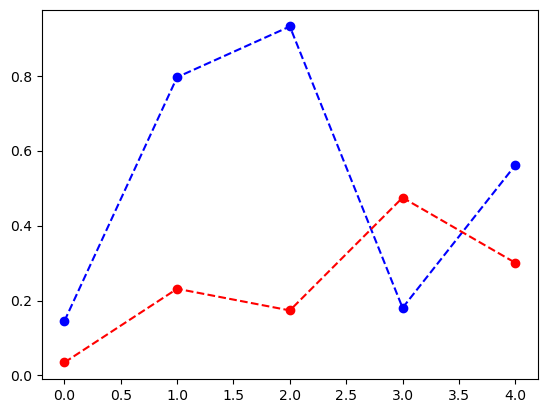

In [69]:
_ = plt.plot(y_true[0, :, 0], color='blue',  marker='o', markersize=6, linestyle='dashed', label="reconstruction")
_ = plt.plot(y_pred[0, :, 0], color='red',  marker='o', markersize=6, linestyle='dashed', label="reconstruction")

In [70]:
y_true = tf.constant(y_true, dtype=tf.float32)
y_pred = tf.constant(y_pred, dtype=tf.float32)

In [71]:
mse_per_sample_features = tf.math.reduce_mean(tf.math.square(y_true - y_pred), axis=1)
mse_per_sample_features

<tf.Tensor: shape=(10, 3), dtype=float32, numpy=
array([[0.21201405, 0.31150475, 0.12515889],
       [0.19796021, 0.08364907, 0.16295786],
       [0.20072675, 0.12865713, 0.26825666],
       [0.23598325, 0.38707843, 0.06629582],
       [0.04701307, 0.13663778, 0.11922375],
       [0.18492703, 0.22119176, 0.09669156],
       [0.0545798 , 0.19436832, 0.1416761 ],
       [0.05472424, 0.22731233, 0.26993868],
       [0.11521997, 0.29820594, 0.10949957],
       [0.18491736, 0.12071025, 0.10977127]], dtype=float32)>

In [76]:
mse_per_sample=tf.math.reduce_sum(mse_per_sample_features * get_weights(3), axis=1) 
mse_per_sample

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([0.23070174, 0.15402277, 0.18795854, 0.25806707, 0.08892308,
       0.18230937, 0.11569203, 0.14812267, 0.1752619 , 0.15099065],
      dtype=float32)>

In [77]:
tf.math.reduce_mean(mse_per_sample)

<tf.Tensor: shape=(), dtype=float32, numpy=0.16920498>